# Data Cleaning - iNaturalist San Diego County Observations

This notebook performs thorough data cleaning on the finalized dataset from iNaturalist. While the data quality from the source is generally good, we will systematically check for and address:

1. **Missing Values** - Identify and handle null/NaN values
2. **Duplicate Records** - Check for and remove duplicate observations
3. **Data Types** - Ensure appropriate data types for each column
4. **Outliers & Invalid Values** - Check for impossible/invalid values (coordinates, dates, etc.)
5. **Text Cleaning** - Standardize text fields where necessary
6. **Data Consistency** - Verify logical consistency between related columns

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('finalized_dataset.csv')

# Basic overview
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn Names:\n{list(df.columns)}")

Dataset Shape: 224,111 rows × 42 columns

Column Names:
['id', 'uuid', 'observed_on_string', 'observed_on', 'time_observed_at', 'time_zone', 'user_id', 'user_login', 'user_name', 'created_at', 'updated_at', 'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list', 'description', 'num_identification_agreements', 'num_identification_disagreements', 'captive_cultivated', 'oauth_application_id', 'place_guess', 'latitude', 'longitude', 'positional_accuracy', 'private_place_guess', 'private_latitude', 'private_longitude', 'public_positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'coordinates_obscured', 'positioning_method', 'positioning_device', 'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name', 'taxon_id', 'zip', 'community']


In [4]:
# Display first few rows
df.head()

,id,uuid,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,private_place_guess,private_latitude,private_longitude,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,zip,community
0,272928517,2d0e5ec4-0e5b-4efd-9598-6bcb1f4e496b,Fri Apr 25 2025 00:23:44 GMT -0700 (PDT),2025-04-25,2025-04-25 07:23:44 UTC,Pacific Time (US & Canada),2806901,irisia,Amanda Moyle,2025-04-25 07:24:36 UTC,2025-05-04 19:35:17 UTC,casual,CC-BY-NC-ND,https://www.inaturalist.org/observations/27292...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,0,0,True,333.0,San Diego,32.731434,-117.151886,6.0,NaN,NaN,NaN,6.0,NaN,NaN,False,NaN,NaN,NaN,Acanthus mollis,Bear's breeches,Plantae,70045.0,92101.0,San Diego
1,273065706,149f982a-ecaf-4db7-9247-a97d497f674b,Fri Apr 25 2025 06:04:03 GMT -0700 (PDT),2025-04-25,2025-04-25 13:04:03 UTC,Pacific Time (US & Canada),7201421,alanislas,NaN,2025-04-25 13:04:57 UTC,2025-04-26 02:36:25 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/27306...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,2,0,False,333.0,Vista,33.168037,-117.240105,3.0,NaN,NaN,NaN,3.0,NaN,NaN,False,NaN,NaN,Garden Snail,Cornu aspersum,Garden Snail,Mollusca,480298.0,92081.0,Vista
2,273066186,ab04833f-1d4c-491c-b88c-07a9e5e733fd,Fri Apr 25 2025 06:05:09 GMT -0700 (PDT),2025-04-25,2025-04-25 13:05:09 UTC,Pacific Time (US & Canada),7201421,alanislas,NaN,2025-04-25 13:05:55 UTC,2025-04-26 02:37:00 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/27306...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,2,0,False,333.0,Vista,33.168037,-117.240105,100.0,NaN,NaN,NaN,100.0,NaN,NaN,False,NaN,NaN,Common Pill Woodlouse,Armadillidium vulgare,Common Pill Woodlouse,Animalia,56083.0,92081.0,Vista
3,273066676,aa1965f6-cd81-4e9e-91d3-275c3da99f1d,2025-04-25 06:05:08-07:00,2025-04-25,2025-04-25 13:05:08 UTC,Pacific Time (US & Canada),8159696,sglevanik,NaN,2025-04-25 13:06:49 UTC,2025-04-25 13:07:25 UTC,casual,CC-BY-NC,https://www.inaturalist.org/observations/27306...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,0,0,False,3.0,"Hidden Mesa Rd, El Cajon, CA, US",32.772315,-116.916834,53.0,NaN,NaN,NaN,53.0,NaN,NaN,False,NaN,NaN,NaN,Lepidoptera,Butterflies and Moths,Insecta,47157.0,92019.0,El Cajon
4,273070032,11c4d7c5-386a-4e09-8182-bd8a9908b0dd,Fri Apr 25 2025 06:11:46 GMT -0700 (PDT),2025-04-25,2025-04-25 13:11:46 UTC,Pacific Time (US & Canada),7201421,alanislas,NaN,2025-04-25 13:12:53 UTC,2025-04-25 13:27:39 UTC,casual,CC-BY-NC,https://www.inaturalist.org/observations/27307...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,0,0,True,333.0,Vista,33.167778,-117.239273,5.0,NaN,NaN,NaN,5.0,NaN,NaN,False,NaN,NaN,common lantana,Lantana camara,common lantana,Plantae,50333.0,92081.0,Vista


In [5]:
# Data types and info
print("Data Types Summary:")
print(df.dtypes)
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

Data Types Summary:
id                                    int64
uuid                                 object
observed_on_string                   object
observed_on                          object
time_observed_at                     object
time_zone                            object
user_id                               int64
user_login                           object
user_name                            object
created_at                           object
updated_at                           object
quality_grade                        object
license                              object
url                                  object
image_url                            object
sound_url                            object
tag_list                             object
description                          object
num_identification_agreements         int64
num_identification_disagreements      int64
captive_cultivated                     bool
oauth_application_id                float64
place_guess 

## 1. Missing Values Analysis

In [6]:
# Comprehensive missing values analysis
missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Non-Null Count': df.notnull().sum(),
    'Data Type': df.dtypes
})

# Sort by missing percentage descending
missing_df = missing_df.sort_values('Missing %', ascending=False)
print("Missing Values Summary (sorted by missing %):\n")
print(missing_df)

Missing Values Summary (sorted by missing %):

                                  Missing Count  Missing %  Non-Null Count  \
private_longitude                        224111     100.00               0   
private_place_guess                      224111     100.00               0   
private_latitude                         224111     100.00               0   
sound_url                                222992      99.50            1119   
tag_list                                 218114      97.32            5997   
geoprivacy                               216051      96.40            8060   
description                              208635      93.09           15476   
positioning_method                       201702      90.00           22409   
positioning_device                       201515      89.92           22596   
taxon_geoprivacy                         154750      69.05           69361   
user_name                                 77157      34.43          146954   
oauth_application

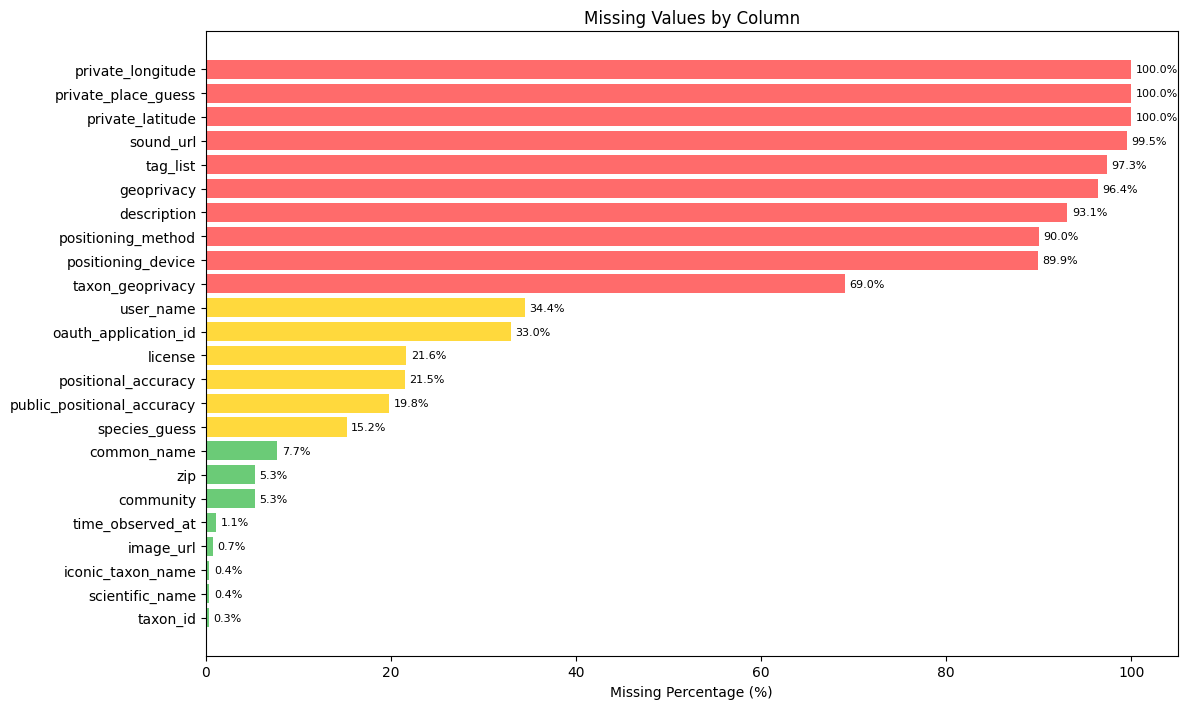

In [7]:
# Visualize missing values for columns with >0% missing
cols_with_missing = missing_df[missing_df['Missing %'] > 0].index.tolist()

if len(cols_with_missing) > 0:
    fig, ax = plt.subplots(figsize=(12, max(6, len(cols_with_missing) * 0.3)))
    missing_pct = missing_df.loc[cols_with_missing, 'Missing %']
    colors = ['#ff6b6b' if x > 50 else '#ffd93d' if x > 10 else '#6bcb77' for x in missing_pct]
    bars = ax.barh(range(len(cols_with_missing)), missing_pct, color=colors)
    ax.set_yticks(range(len(cols_with_missing)))
    ax.set_yticklabels(cols_with_missing)
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_title('Missing Values by Column')
    ax.invert_yaxis()
    
    # Add percentage labels
    for i, (bar, pct) in enumerate(zip(bars, missing_pct)):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values!")

## 2. Duplicate Records Check

In [8]:
# Check for duplicate observations
# 'id' should be unique for each observation

print("Duplicate Analysis:")
print(f"Total rows: {len(df):,}")
print(f"Unique observation IDs: {df['id'].nunique():,}")
print(f"Duplicate IDs: {len(df) - df['id'].nunique():,}")

# Check for exact row duplicates
exact_duplicates = df.duplicated().sum()
print(f"\nExact row duplicates: {exact_duplicates:,}")

# If there are duplicates, show them
if exact_duplicates > 0:
    print("\nSample of duplicate rows:")
    duplicates = df[df.duplicated(keep=False)]
    print(duplicates.head(10))

Duplicate Analysis:
Total rows: 224,111
Unique observation IDs: 224,109
Duplicate IDs: 2

Exact row duplicates: 0


In [9]:
# Check for duplicate UUIDs as well
print(f"Unique UUIDs: {df['uuid'].nunique():,}")
print(f"Duplicate UUIDs: {len(df) - df['uuid'].nunique():,}")

Unique UUIDs: 224,109
Duplicate UUIDs: 2


## 3. Data Type Validation & Conversion

In [10]:
# Convert date columns to datetime
date_columns = ['observed_on', 'time_observed_at', 'created_at', 'updated_at']

print("Converting date columns to datetime format...")
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        invalid_dates = df[col].isnull().sum()
        if invalid_dates > 0:
            print(f"  {col}: {invalid_dates:,} invalid/null dates")
        else:
            print(f"  {col}: converted successfully")

print(f"\nDate range: {df['observed_on'].min()} to {df['observed_on'].max()}")

Converting date columns to datetime format...
  observed_on: converted successfully
  time_observed_at: 2,445 invalid/null dates
  created_at: converted successfully
  updated_at: converted successfully

Date range: 2024-03-01 00:00:00 to 2025-05-31 00:00:00


In [11]:
# Add binary indicator: 1 = observation during City Nature Challenge, 0 = not
# CNC 2024: April 26-29; CNC 2025: April 25-28
cnc_windows = [
    (pd.Timestamp('2024-04-26'), pd.Timestamp('2024-04-29')),
    (pd.Timestamp('2025-04-25'), pd.Timestamp('2025-04-28')),
]

def during_competition(obs_date):
    if pd.isna(obs_date):
        return 0
    for start, end in cnc_windows:
        if start <= obs_date.normalize() <= end:
            return 1
    return 0

df['during_competition'] = df['observed_on'].apply(during_competition).astype(int)
print(f"During competition (1): {df['during_competition'].sum():,}")
print(f"Not during competition (0): {(df['during_competition'] == 0).sum():,}")

During competition (1): 32,338
Not during competition (0): 191,773


In [12]:
# Convert boolean columns
boolean_columns = ['captive_cultivated', 'coordinates_obscured']

print("Checking boolean columns...")
for col in boolean_columns:
    if col in df.columns:
        print(df[col].value_counts(dropna=False))

Checking boolean columns...
captive_cultivated
False    216318
True       7793
Name: count, dtype: int64
coordinates_obscured
False    211315
True      12796
Name: count, dtype: int64


In [13]:
# Check categorical columns
categorical_columns = ['quality_grade', 'license', 'geoprivacy', 'taxon_geoprivacy', 'iconic_taxon_name']

print("Categorical columns value counts:")
for col in categorical_columns:
    if col in df.columns:
        print("\n")
        print(df[col].value_counts(dropna=False))

Categorical columns value counts:


quality_grade
research    146605
needs_id     68652
casual        8854
Name: count, dtype: int64


license
CC-BY-NC       144416
NaN             48512
CC-BY           18145
CC0              9443
CC-BY-NC-ND      2803
CC-BY-NC-SA       420
CC-BY-ND          313
CC-BY-SA           59
Name: count, dtype: int64


geoprivacy
NaN         216051
obscured      8060
Name: count, dtype: int64


taxon_geoprivacy
NaN         154750
open         64313
obscured      5048
Name: count, dtype: int64


iconic_taxon_name
Plantae           131677
Aves               30761
Insecta            28344
Mollusca            7629
Animalia            5038
Fungi               4905
Reptilia            4748
Mammalia            4300
Arachnida           2995
Actinopterygii      1124
Chromista            848
NaN                  815
Amphibia             793
Protozoa             134
Name: count, dtype: int64


## 4. Geographic Data Validation

In [14]:
# Validate latitude and longitude
# San Diego County approximate bounds: Lat 32.5-33.5, Lon -117.6 to -116.0

print("Geographic Data Validation:")
print(f"\nLatitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
print(f"Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")

# Check for missing coordinates
missing_lat = df['latitude'].isnull().sum()
missing_lon = df['longitude'].isnull().sum()
print(f"\nMissing latitude: {missing_lat:,} ({missing_lat/len(df)*100:.2f}%)")
print(f"Missing longitude: {missing_lon:,} ({missing_lon/len(df)*100:.2f}%)")

# Check for coordinates outside San Diego County
sd_lat_min, sd_lat_max = 32.5, 33.6
sd_lon_min, sd_lon_max = -117.7, -115.8

outside_bounds = df[
    (df['latitude'].notna()) & (df['longitude'].notna()) &
    ((df['latitude'] < sd_lat_min) | (df['latitude'] > sd_lat_max) |
     (df['longitude'] < sd_lon_min) | (df['longitude'] > sd_lon_max))
]

print(f"\nObservations potentially outside San Diego County bounds: {len(outside_bounds):,}")
if len(outside_bounds) > 0:
    print("Sample of out-of-bounds observations:")
    print(outside_bounds[['id', 'latitude', 'longitude', 'place_guess', 'community']].head(10))

Geographic Data Validation:

Latitude range: 32.4001 to 33.5992
Longitude range: -117.7159 to -116.0001

Missing latitude: 0 (0.00%)
Missing longitude: 0 (0.00%)

Observations potentially outside San Diego County bounds: 344
Sample of out-of-bounds observations:
              id   latitude   longitude    place_guess community
1421   273404813  32.494165 -117.101322  United States       NaN
2261   273510341  32.472310 -116.760194  United States       NaN
4639   273939135  32.472908 -117.108032  United States       NaN
4813   273953179  32.446129 -117.115819  United States       NaN
6082   274071081  32.464371 -116.746339  United States       NaN
10200  274430640  32.458054 -116.602096  United States       NaN
10587  274466875  32.434542 -116.858852  United States       NaN
10948  274688269  32.400851 -117.178706  United States       NaN
11545  274803474  32.437501 -117.163945  United States       NaN
12180  274880437  32.444787 -117.154119  United States       NaN


In [15]:
# Validate positional accuracy (should be positive or null)
print("Positional Accuracy Analysis:")
print(df['positional_accuracy'].describe())

# Check for negative or unreasonably large accuracy values
invalid_accuracy = df[
    (df['positional_accuracy'].notna()) & 
    ((df['positional_accuracy'] < 0) | (df['positional_accuracy'] > 100000))
]
print(f"\nInvalid positional accuracy values: {len(invalid_accuracy):,}")

Positional Accuracy Analysis:
count    1.759590e+05
mean     5.690406e+02
std      3.136633e+04
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      4.700000e+01
max      8.929687e+06
Name: positional_accuracy, dtype: float64

Invalid positional accuracy values: 54


In [16]:
# Check zip code validity
print("Zip Code Analysis:")
print(df['zip'].describe())

# Check for invalid zip codes (should be 5-digit for US)
invalid_zips = df[
    (df['zip'].notna()) & 
    ((df['zip'] < 10000) | (df['zip'] > 99999))
]
print(f"\nInvalid zip codes: {len(invalid_zips):,}")

# Most common zip codes
print("\nTop 15 most common zip codes:")
print(df['zip'].value_counts().head(15))

Zip Code Analysis:
count    212273.000000
mean      92045.615048
std          77.485883
min       91901.000000
25%       92004.000000
50%       92037.000000
75%       92106.000000
max       92672.000000
Name: zip, dtype: float64

Invalid zip codes: 0

Top 15 most common zip codes:
zip
92004.0    25103
92036.0    13945
92037.0    13508
92124.0    11004
92040.0     5884
92109.0     5068
92106.0     4926
92065.0     4839
92154.0     4111
91910.0     4072
92101.0     3904
91932.0     3596
91916.0     3530
92014.0     3489
92019.0     3100
Name: count, dtype: int64


## 5. Taxonomic Data Validation

In [17]:
# Check taxonomic data
print("Taxonomic Data Analysis:")
print(f"\nUnique scientific names: {df['scientific_name'].nunique():,}")
print(f"Unique common names: {df['common_name'].nunique():,}")
print(f"Unique taxon IDs: {df['taxon_id'].nunique():,}")

# Missing taxonomic information
print(f"\nMissing scientific_name: {df['scientific_name'].isnull().sum():,}")
print(f"Missing common_name: {df['common_name'].isnull().sum():,}")
print(f"Missing taxon_id: {df['taxon_id'].isnull().sum():,}")

# Iconic taxon distribution
print("\nIconic Taxon Distribution:")
print(df['iconic_taxon_name'].value_counts(dropna=False))

Taxonomic Data Analysis:

Unique scientific names: 10,784
Unique common names: 7,878
Unique taxon IDs: 10,868

Missing scientific_name: 809
Missing common_name: 17,223
Missing taxon_id: 685

Iconic Taxon Distribution:
iconic_taxon_name
Plantae           131677
Aves               30761
Insecta            28344
Mollusca            7629
Animalia            5038
Fungi               4905
Reptilia            4748
Mammalia            4300
Arachnida           2995
Actinopterygii      1124
Chromista            848
NaN                  815
Amphibia             793
Protozoa             134
Name: count, dtype: int64


## 6. Numeric Fields Validation

In [18]:
# Check numeric fields for outliers or invalid values
numeric_cols = ['num_identification_agreements', 'num_identification_disagreements', 
                'user_id', 'taxon_id', 'oauth_application_id']

print("Numeric Fields Summary:")
for col in numeric_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].describe())
        
        # Check for negative values where they shouldn't exist
        if col in ['num_identification_agreements', 'num_identification_disagreements']:
            negative_vals = (df[col] < 0).sum()
            if negative_vals > 0:
                print(f"  WARNING: {negative_vals} negative values found!")

Numeric Fields Summary:

num_identification_agreements:
count    224111.000000
mean          1.144486
std           0.970412
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: num_identification_agreements, dtype: float64

num_identification_disagreements:
count    224111.000000
mean          0.012895
std           0.120548
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: num_identification_disagreements, dtype: float64

user_id:
count    2.241110e+05
mean     3.251544e+06
std      2.996790e+06
min      3.770000e+02
25%      7.476350e+05
50%      1.853666e+06
75%      5.820366e+06
max      1.010807e+07
Name: user_id, dtype: float64

taxon_id:
count    2.234260e+05
mean     1.671371e+05
std      2.950369e+05
min      1.000000e+00
25%      5.098700e+04
50%      5.969800e+04
75%      1.176960e+05
max      1.665961e+06
Name: taxon_id, dtype: float64


## 7. URL and Media Validation

In [19]:
# Check URL columns
url_columns = ['url', 'image_url', 'sound_url']

print("URL/Media Columns Analysis:")
for col in url_columns:
    if col in df.columns:
        non_null = df[col].notna().sum()
        print(f"\n{col}:")
        print(f"  Non-null values: {non_null:,} ({non_null/len(df)*100:.2f}%)")
        
        # Check URL format (basic validation)
        if non_null > 0:
            valid_urls = df[col].str.startswith(('http://', 'https://'), na=False).sum()
            print(f"  Valid URL format: {valid_urls:,}")

URL/Media Columns Analysis:

url:
  Non-null values: 224,111 (100.00%)
  Valid URL format: 224,111

image_url:
  Non-null values: 222,497 (99.28%)
  Valid URL format: 222,497

sound_url:
  Non-null values: 1,119 (0.50%)
  Valid URL format: 1,119


## 8. Text Fields Cleaning

In [20]:
# Check text columns for whitespace issues
text_columns = ['species_guess', 'scientific_name', 'common_name', 'place_guess', 'community']

print("Text Fields Analysis:")
for col in text_columns:
    if col in df.columns:
        non_null = df[col].notna().sum()
        
        if non_null > 0:
            # Check for leading/trailing whitespace
            whitespace_issues = df[col].str.strip().ne(df[col]).sum()
            # Check for empty strings
            empty_strings = (df[col] == '').sum()
            
            print(f"\n{col}:")
            print(f"  Non-null values: {non_null:,}")
            print(f"  Leading/trailing whitespace: {whitespace_issues}")
            print(f"  Empty strings: {empty_strings}")

Text Fields Analysis:

species_guess:
  Non-null values: 190,063
  Leading/trailing whitespace: 34048
  Empty strings: 0

scientific_name:
  Non-null values: 223,302
  Leading/trailing whitespace: 809
  Empty strings: 0

common_name:
  Non-null values: 206,888
  Leading/trailing whitespace: 17223
  Empty strings: 0

place_guess:
  Non-null values: 224,107
  Leading/trailing whitespace: 126
  Empty strings: 0

community:
  Non-null values: 212,273
  Leading/trailing whitespace: 11838
  Empty strings: 0


In [21]:
# Clean text fields - strip whitespace
print("Cleaning text fields...")
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].str.strip()

print("Text fields cleaned - whitespace stripped.")

Cleaning text fields...
Text fields cleaned - whitespace stripped.


## 9. Data Consistency Checks

In [22]:
# Check logical consistency between columns

print("Data Consistency Checks:")

# 1. Check that created_at >= observed_on (observation can't be created before it happened)
if df['created_at'].notna().any() and df['observed_on'].notna().any():
    # Convert to date for comparison
    inconsistent_dates = df[
        (df['created_at'].notna()) & 
        (df['observed_on'].notna()) & 
        (df['created_at'].dt.date < df['observed_on'].dt.date)
    ]
    print(f"\n1. Observations created before observed date: {len(inconsistent_dates):,}")
    if len(inconsistent_dates) > 0:
        print("   (This could be due to timezone differences or data entry)")

# 2. Check that updated_at >= created_at
if df['updated_at'].notna().any() and df['created_at'].notna().any():
    inconsistent_updates = df[
        (df['updated_at'].notna()) & 
        (df['created_at'].notna()) & 
        (df['updated_at'] < df['created_at'])
    ]
    print(f"\n2. Records updated before creation: {len(inconsistent_updates):,}")

# 3. Quality grade consistency - research grade should have agreements
research_no_agreement = df[
    (df['quality_grade'] == 'research') & 
    (df['num_identification_agreements'] == 0)
]
print(f"\n3. Research grade with 0 agreements: {len(research_no_agreement):,}")
print("   (Research grade typically requires community agreement)")

# 4. Check coordinates_obscured consistency with geoprivacy
obscured_no_privacy = df[
    (df['coordinates_obscured'] == True) & 
    (df['geoprivacy'].isna()) & 
    (df['taxon_geoprivacy'].isna())
]
print(f"\n4. Obscured coords with no geoprivacy setting: {len(obscured_no_privacy):,}")

Data Consistency Checks:

1. Observations created before observed date: 0

2. Records updated before creation: 0

3. Research grade with 0 agreements: 295
   (Research grade typically requires community agreement)

4. Obscured coords with no geoprivacy setting: 0


## 10. Summary Statistics & Quality Score

In [23]:
# Create a comprehensive data quality summary
print("=" * 60)
print("DATA QUALITY SUMMARY")
print("=" * 60)

total_rows = len(df)
total_cols = len(df.columns)

# Calculate quality metrics
metrics = {
    'Total Records': f"{total_rows:,}",
    'Total Columns': total_cols,
    'Duplicate Rows': df.duplicated().sum(),
    'Complete Rows (no nulls)': f"{(df.dropna().shape[0]):,} ({df.dropna().shape[0]/total_rows*100:.1f}%)",
    'Records with Coordinates': f"{df['latitude'].notna().sum():,} ({df['latitude'].notna().sum()/total_rows*100:.1f}%)",
    'Records with Species ID': f"{df['scientific_name'].notna().sum():,} ({df['scientific_name'].notna().sum()/total_rows*100:.1f}%)",
    'Research Grade Records': f"{(df['quality_grade'] == 'research').sum():,} ({(df['quality_grade'] == 'research').sum()/total_rows*100:.1f}%)",
    'Records with Images': f"{df['image_url'].notna().sum():,} ({df['image_url'].notna().sum()/total_rows*100:.1f}%)",
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")

DATA QUALITY SUMMARY
Total Records: 224,111
Total Columns: 43
Duplicate Rows: 0
Complete Rows (no nulls): 0 (0.0%)
Records with Coordinates: 224,111 (100.0%)
Records with Species ID: 223,302 (99.6%)
Research Grade Records: 146,605 (65.4%)
Records with Images: 222,497 (99.3%)


## 11. Apply Cleaning Operations

In [24]:
# Store original count for comparison
original_count = len(df)
print(f"Original dataset: {original_count:,} rows")

# 1. Remove exact duplicates (if any)
df_clean = df.drop_duplicates()
print(f"After removing duplicates: {len(df_clean):,} rows (removed {original_count - len(df_clean):,})")

# 2. Remove duplicate observation IDs (keep first occurrence)
df_clean = df_clean.drop_duplicates(subset=['id'], keep='first')
print(f"After removing duplicate IDs: {len(df_clean):,} rows")

# Note: We keep records with missing coordinates as they may still be valuable for species analysis

Original dataset: 224,111 rows
After removing duplicates: 224,111 rows (removed 0)
After removing duplicate IDs: 224,109 rows


In [25]:
# Identify and drop columns with high missing values (>90%)
high_missing = missing_df[missing_df['Missing %'] > 90].index.tolist()
print(f"Columns with >90% missing values: {high_missing}")

# Drop these columns
print(f"\nDropping {len(high_missing)} columns with high missingness...")
df_clean = df_clean.drop(columns=high_missing, errors='ignore')

print(f"Columns dropped: {high_missing}")
print(f"Remaining columns: {len(df_clean.columns)}")


Columns with >90% missing values: ['private_longitude', 'private_place_guess', 'private_latitude', 'sound_url', 'tag_list', 'geoprivacy', 'description']

Dropping 7 columns with high missingness...
Columns dropped: ['private_longitude', 'private_place_guess', 'private_latitude', 'sound_url', 'tag_list', 'geoprivacy', 'description']
Remaining columns: 36


## 12. Final Data Quality Report

In [26]:
# Final quality report
print("=" * 60)
print("FINAL DATA QUALITY REPORT")
print("=" * 60)

print(f"\n📊 Dataset Overview:")
print(f"   • Total observations: {len(df_clean):,}")
print(f"   • Total features: {len(df_clean.columns)}")
print(f"   • Date range: {df_clean['observed_on'].min().date()} to {df_clean['observed_on'].max().date()}")

print(f"\n🗺️ Geographic Coverage:")
print(f"   • Observations with coordinates: {df_clean['latitude'].notna().sum():,}")
print(f"   • Unique communities/cities: {df_clean['community'].nunique()}")
print(f"   • Unique zip codes: {df_clean['zip'].nunique()}")

print(f"\n🦋 Taxonomic Coverage:")
print(f"   • Unique species (scientific names): {df_clean['scientific_name'].nunique():,}")
print(f"   • Iconic taxa represented: {df_clean['iconic_taxon_name'].nunique()}")
print(f"   • Most observed taxon: {df_clean['iconic_taxon_name'].value_counts().index[0]}")

print(f"\n✅ Quality Metrics:")
print(f"   • Research grade: {(df_clean['quality_grade'] == 'research').sum():,} ({(df_clean['quality_grade'] == 'research').mean()*100:.1f}%)")
print(f"   • Needs ID: {(df_clean['quality_grade'] == 'needs_id').sum():,} ({(df_clean['quality_grade'] == 'needs_id').mean()*100:.1f}%)")
print(f"   • Casual: {(df_clean['quality_grade'] == 'casual').sum():,} ({(df_clean['quality_grade'] == 'casual').mean()*100:.1f}%)")


FINAL DATA QUALITY REPORT

📊 Dataset Overview:
   • Total observations: 224,109
   • Total features: 36
   • Date range: 2024-03-01 to 2025-05-31

🗺️ Geographic Coverage:
   • Observations with coordinates: 224,109
   • Unique communities/cities: 53
   • Unique zip codes: 113

🦋 Taxonomic Coverage:
   • Unique species (scientific names): 10,784
   • Iconic taxa represented: 13
   • Most observed taxon: Plantae

✅ Quality Metrics:
   • Research grade: 146,604 (65.4%)
   • Needs ID: 68,651 (30.6%)
   • Casual: 8,854 (4.0%)


In [28]:
df_clean.head()

,id,uuid,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,zip,community,during_competition
0,272928517,2d0e5ec4-0e5b-4efd-9598-6bcb1f4e496b,Fri Apr 25 2025 00:23:44 GMT -0700 (PDT),2025-04-25,2025-04-25 07:23:44+00:00,Pacific Time (US & Canada),2806901,irisia,Amanda Moyle,2025-04-25 07:24:36+00:00,2025-05-04 19:35:17+00:00,casual,CC-BY-NC-ND,https://www.inaturalist.org/observations/27292...,https://inaturalist-open-data.s3.amazonaws.com...,0,0,True,333.0,San Diego,32.731434,-117.151886,6.0,6.0,NaN,False,NaN,NaN,NaN,Acanthus mollis,Bear's breeches,Plantae,70045.0,92101.0,San Diego,1
1,273065706,149f982a-ecaf-4db7-9247-a97d497f674b,Fri Apr 25 2025 06:04:03 GMT -0700 (PDT),2025-04-25,2025-04-25 13:04:03+00:00,Pacific Time (US & Canada),7201421,alanislas,NaN,2025-04-25 13:04:57+00:00,2025-04-26 02:36:25+00:00,research,CC-BY-NC,https://www.inaturalist.org/observations/27306...,https://inaturalist-open-data.s3.amazonaws.com...,2,0,False,333.0,Vista,33.168037,-117.240105,3.0,3.0,NaN,False,NaN,NaN,Garden Snail,Cornu aspersum,Garden Snail,Mollusca,480298.0,92081.0,Vista,1
2,273066186,ab04833f-1d4c-491c-b88c-07a9e5e733fd,Fri Apr 25 2025 06:05:09 GMT -0700 (PDT),2025-04-25,2025-04-25 13:05:09+00:00,Pacific Time (US & Canada),7201421,alanislas,NaN,2025-04-25 13:05:55+00:00,2025-04-26 02:37:00+00:00,research,CC-BY-NC,https://www.inaturalist.org/observations/27306...,https://inaturalist-open-data.s3.amazonaws.com...,2,0,False,333.0,Vista,33.168037,-117.240105,100.0,100.0,NaN,False,NaN,NaN,Common Pill Woodlouse,Armadillidium vulgare,Common Pill Woodlouse,Animalia,56083.0,92081.0,Vista,1
3,273066676,aa1965f6-cd81-4e9e-91d3-275c3da99f1d,2025-04-25 06:05:08-07:00,2025-04-25,2025-04-25 13:05:08+00:00,Pacific Time (US & Canada),8159696,sglevanik,NaN,2025-04-25 13:06:49+00:00,2025-04-25 13:07:25+00:00,casual,CC-BY-NC,https://www.inaturalist.org/observations/27306...,https://inaturalist-open-data.s3.amazonaws.com...,0,0,False,3.0,"Hidden Mesa Rd, El Cajon, CA, US",32.772315,-116.916834,53.0,53.0,NaN,False,NaN,NaN,NaN,Lepidoptera,Butterflies and Moths,Insecta,47157.0,92019.0,El Cajon,1
4,273070032,11c4d7c5-386a-4e09-8182-bd8a9908b0dd,Fri Apr 25 2025 06:11:46 GMT -0700 (PDT),2025-04-25,2025-04-25 13:11:46+00:00,Pacific Time (US & Canada),7201421,alanislas,NaN,2025-04-25 13:12:53+00:00,2025-04-25 13:27:39+00:00,casual,CC-BY-NC,https://www.inaturalist.org/observations/27307...,https://inaturalist-open-data.s3.amazonaws.com...,0,0,True,333.0,Vista,33.167778,-117.239273,5.0,5.0,NaN,False,NaN,NaN,common lantana,Lantana camara,common lantana,Plantae,50333.0,92081.0,Vista,1


## 13. Save Cleaned Dataset

In [29]:
# Save the cleaned dataset
output_path = 'cleaned_finalized_dataset.csv'
df_clean.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")
print(f"   • Rows: {len(df_clean):,}")
print(f"   • Columns: {len(df_clean.columns)}")

✅ Cleaned dataset saved to: cleaned_finalized_dataset.csv
   • Rows: 224,109
   • Columns: 36


## Summary of Cleaning Steps Performed

1. **Loaded** the dataset with 226,987 observations and 41 columns
2. **Analyzed missing values** across all columns and visualized the pattern
3. **Checked for duplicates** based on observation IDs and exact row matches
4. **Converted date columns** to proper datetime format (`observed_on`, `time_observed_at`, `created_at`, `updated_at`)
5. **Validated geographic data** - checked coordinate ranges for San Diego County bounds
6. **Validated taxonomic data** - checked for missing species information
7. **Verified numeric fields** - ensured no negative values in count fields
8. **Validated URLs** - checked format of observation and media URLs
9. **Cleaned text fields** - stripped leading/trailing whitespace
10. **Performed consistency checks** - verified logical relationships between columns
11. **Removed duplicates** - kept unique observations
12. **Generated quality report** with comprehensive statistics
13. **Saved cleaned dataset** for further analysis

### Key Findings:
- The iNaturalist data is generally high quality
- Some columns have high missing rates (private location data, descriptions) which is expected
- Date formats were standardized for analysis
- Text fields were cleaned of whitespace issues
- The dataset is ready for exploratory data analysis (EDA)